# Previsione di opportunità di Cross Sell di assicurazioni

# Modello in grado di prevedere quali clienti potrebbero essere interessati ad acquistare un'assicurazione per il proprio veicolo

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("insurance_cross_sell.csv")

In [4]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df.shape

(381109, 12)

In [6]:
df=df.drop("id",axis=1)

In [7]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [8]:
df.shape

(381109, 11)

#### 381109 osservazioni
#### 11 variabili, di cui: 10 features, 1 target (Response)

In [8]:
missing_values=df.isnull().sum()
print(missing_values)

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


#### Non ci sono valori mancanti

In [9]:
df.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

#### Variabili qualitative (già codificate): Region_Code, Policy_Sales_Channel
#### Variabili qualitative (non codificate): Vehicle_Age 
#### Variabili qualitative dicotomiche (già codificate): Driving_License, Previously_Insured
#### Variabili qualitative dicotomiche (non codificate): Gender, Vehicle_Damage
#### Variabili quantitative: Age, Annual_Premium, Vintage
#### Variabile Target dicotomica (già codificata; classe 1 positiva, classe 0 negativa): Response

## Codifica delle variabili qualitative : Gender, Vehicle_Damage, Vehicle_Age

In [10]:
map_function={"Male": 0,
             "Female": 1}

In [11]:
df["Gender"]=df["Gender"].map(map_function)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,0,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,0,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,0,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,1,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [12]:
map_function={"No": 0,
             "Yes": 1}

In [13]:
df["Vehicle_Damage"]=df["Vehicle_Damage"].map(map_function)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [21]:
pd.unique(df["Vehicle_Age"])

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [22]:
map_function={"< 1 Year": 0,
             "1-2 Year": 1,
             "> 2 Years": 2}

In [23]:
df["Vehicle_Age"]=df["Vehicle_Age"].map(map_function)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [24]:
X=df.drop("Response",axis=1)

In [25]:
y=df["Response"]

## Distribuzione variabile target

In [18]:
y[y==0].shape[0]/y.shape[0]*100

87.74366388618479

#### Il dataset è sbilanciato verso la classe 0 

## Creazione di train set e test set

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0) 

## Standardizzazione delle features 

In [34]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

## Creazione di un modello di Classificazione Binaria tramite Regressione Logistica

In [35]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(class_weight="balanced",random_state=0)
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', random_state=0)

## Otteniamo le predizioni e le rispettive probabilità

In [36]:
y_pred_train=lr.predict(X_train)
y_proba_train=lr.predict_proba(X_train) 
y_pred_test=lr.predict(X_test)
y_proba_test=lr.predict_proba(X_test)

## Valutazione del modello

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
print(f"TRAIN LOSS: {log_loss(y_train,y_proba_train)}")
print(f"TEST LOSS: {log_loss(y_test,y_proba_test)}")

TRAIN LOSS: 0.49122051045921733
TEST LOSS: 0.49189672779276866


#### I due valori della log loss su train set e test set sono molto buoni in quanto prossimi a 0; inoltre hanno valori poco diversi, indicando prestazioni simili sui due set

In [38]:
print("TRAIN REPORT")
print(classification_report(y_train,y_pred_train))
print("TEST REPORT")
print(classification_report(y_test,y_pred_test))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    234158
           1       0.25      0.98      0.40     32618

    accuracy                           0.64    266776
   macro avg       0.62      0.78      0.57    266776
weighted avg       0.90      0.64      0.70    266776

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100241
           1       0.25      0.98      0.40     14092

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333



In [39]:
precision_train=precision_score(y_train,y_pred_train)
accuracy_train=accuracy_score(y_train,y_pred_train)
recall_train=recall_score(y_train,y_pred_train)

precision_test=precision_score(y_test,y_pred_test)
accuracy_test=accuracy_score(y_test,y_pred_test)
recall_test=recall_score(y_test,y_pred_test)

In [54]:
def plot_confusion_matrix(y_true,y_pred,precision,recall,accuracy):

    cm=confusion_matrix(y_true,y_pred) 
    
    df_cm=pd.DataFrame(cm,
                       index=["True Negative","True Positive"],
                       columns=["Predicted Negative","Predicted Positive"])
    
    FP_prop=df_cm.loc["True Negative","Predicted Positive"]/df_cm.values.sum()*100
    FN_prop=df_cm.loc["True Positive","Predicted Negative"]/df_cm.values.sum()*100

    df_cm
    
    plt.title("Precision: %.2f \nRecall: %.2f \nAccuracy: %.2f"%(precision,recall,accuracy))
    sns.heatmap(df_cm,annot=True,fmt='g')
    
    print("False positive: %.2f"%FP_prop)
    print("False negative: %.2f"%FN_prop)

False positive: 35.76
False negative: 0.30


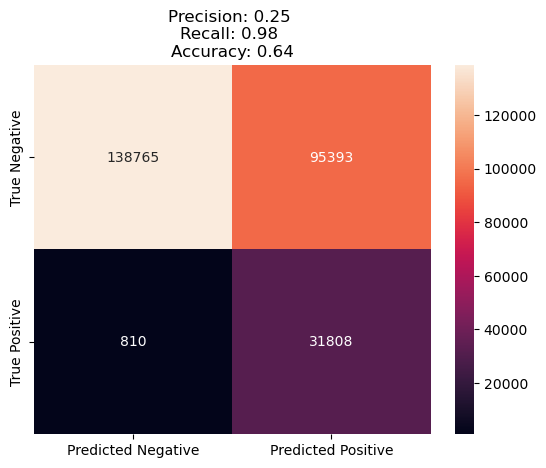

In [55]:
plot_confusion_matrix(y_train, y_pred_train, precision_train, recall_train, accuracy_train)

#### Volendo individuare quasi tutti i clienti che con alta probabilità accetterebbero l'acquisto dell'assicurazione, decidiamo di favorire un modello con pochi falsi negativi e quindi alta RECALL: questo modello mostra un'alta recall  (0.98) e pochi falsi negativi (0.30 %) ma una bassa precision (0.25) che si traduce in molti falsi positivi (circa 36 %).

False positive: 35.84
False negative: 0.28


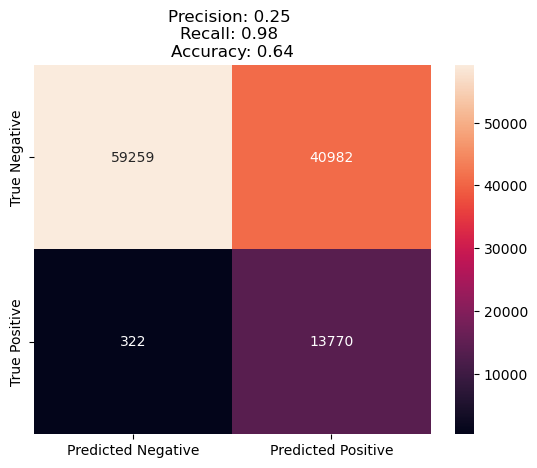

In [56]:
plot_confusion_matrix(y_test, y_pred_test, precision_test, recall_test, accuracy_test)

In [57]:
def roc_curve_display(model,X,y):

    RocCurveDisplay.from_estimator(model, 
                                   X, 
                                   y, 
                                   name="Vehicle Insurance Customer Classifier")
    plt.show()

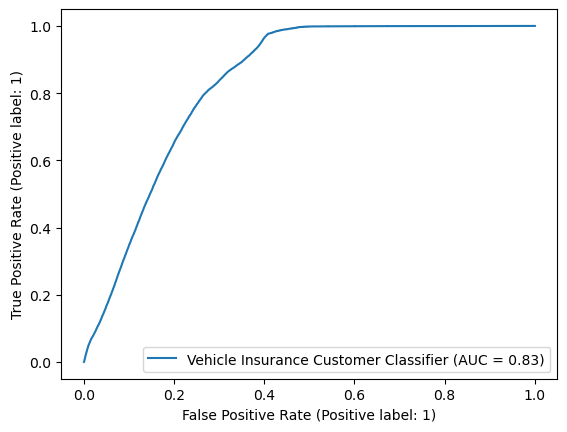

In [58]:
roc_curve_display(lr,X_train,y_train)

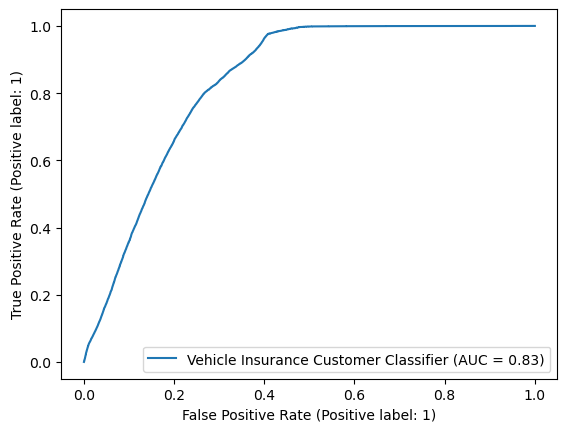

In [33]:
roc_curve_display(lr,X_test,y_test)

## Proviamo ad alzare la soglia per ridurre il numero di falsi positivi

In [59]:
from matplotlib.pyplot import figure

In [60]:
def binary_classifier_thresholds(y_true,
                                 y_proba,
                                 positive_class=1):
    
    threshold_list=[x/20  for x in range(0, 20, 1)]
    fpr=list()
    tpr=list()
    for i,thresh in enumerate(threshold_list):
        condition=y_proba[:,positive_class]>thresh
        y_pred=np.where(condition,1,0)
        tpr.append(recall_score(y_true,y_pred))
        fpr.append(1-recall_score(y_true,y_pred,pos_label=0)) # la recall per la classe negativa è equivalente alla specificità
        
    roc_values= pd.DataFrame(zip(threshold_list,tpr,fpr), columns=["Threshold", "TPR","FPR"])

    plt.figure(figsize=(15,10)) 
    plt.scatter(fpr, tpr) 
    plt.title("ROC with Thresholds")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    
    return(roc_values)

,Threshold,TPR,FPR
0,0.00,1.000000,1.000000
1,0.05,0.996965,0.483362
2,0.10,0.996505,0.477750
3,0.15,0.995708,0.474859
4,0.20,0.988105,0.439921
5,0.25,0.983905,0.426242
6,0.30,0.978294,0.413170
7,0.35,0.976547,0.408634
8,0.40,0.976332,0.407874
9,0.45,0.975934,0.407626


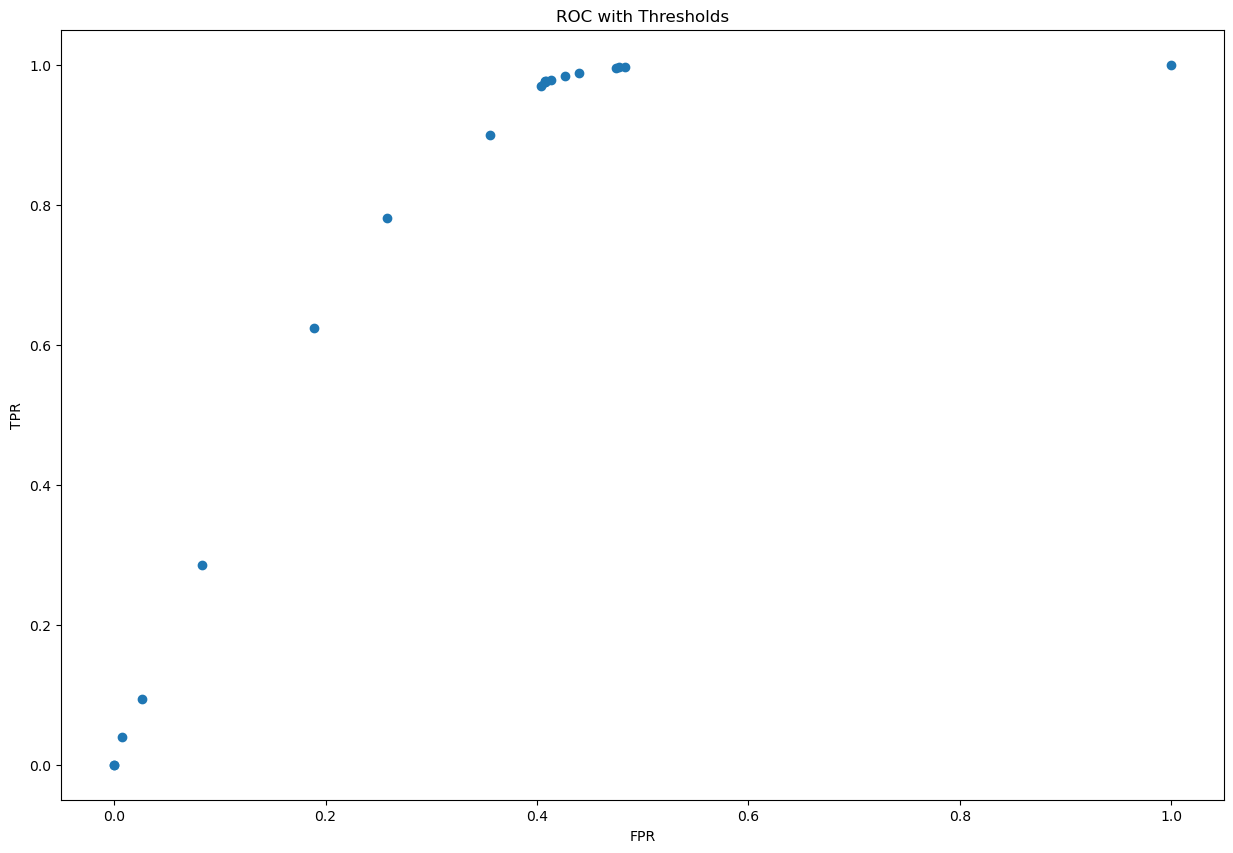

In [61]:
roc_values_train=binary_classifier_thresholds(y_train,y_proba_train)
roc_values_train

#### Scelgo la soglia in corrispondenza della quale la Recall (TPR) scende a circa 0.90, ovvero thresh=0.60

In [62]:
y_pred_train=np.where(y_proba_train[:,1]>0.60,1,0) 
y_pred_test=np.where(y_proba_test[:,1]>0.60,1,0)

In [63]:
precision_train=precision_score(y_train,y_pred_train)
accuracy_train=accuracy_score(y_train,y_pred_train)
recall_train=recall_score(y_train,y_pred_train)

precision_test=precision_score(y_test,y_pred_test)
accuracy_test=accuracy_score(y_test,y_pred_test)
recall_test=recall_score(y_test,y_pred_test)

False positive: 31.21
False negative: 1.23


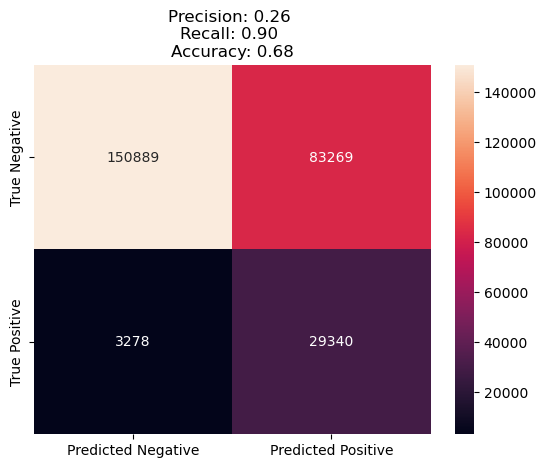

In [64]:
plot_confusion_matrix(y_train, y_pred_train, precision_train, recall_train, accuracy_train)

False positive: 31.42
False negative: 1.25


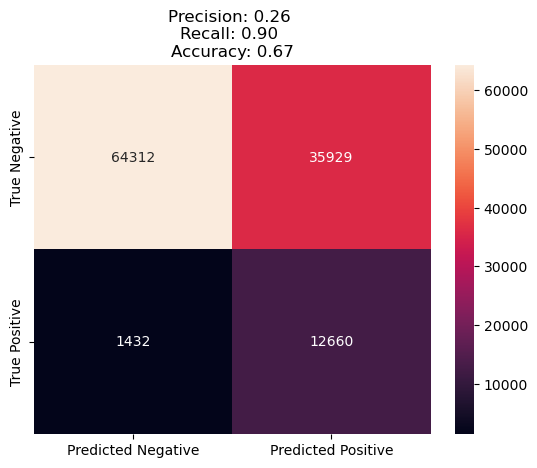

In [65]:
plot_confusion_matrix(y_test, y_pred_test, precision_test, recall_test, accuracy_test)

#### Abbiamo sacrificato una parte di falsi negativi (che sono aumentati) allo scopo di ridurre i falsi positivi